# Detection Notebook

This notebook show some examples on how to perform CMFD using a modified version of [1] and [2,3]


## Before runing this notebook, make sure to build or install the docker images using:
```
docker pull phillipecardenuto/cmfd:vole
docker pull phillipecardenuto/cmfd:fd
```


Reference:
[1] "Evaluation of Popular Copy-Move Forgery Detection Approaches" by V. Christlein, C. Riess, J. Jordan, C. Riess and E. Angelopoulou, IEEE TIFS, vol.
7, no. 6, pp. 1841-1854, Dec. 2012.

[2] Davide Cozzolino, Giovanni Poggi, and Luisa Verdoliva, Efficient dense-field copy-move forgery detection, IEEE Transactions on Information Forensics and Security, 10 (2015),pp. 2284-2297

[3] T. Ehret, “Automatic detection of internal copy-move forgeries in images,” Image Processing On Line, vol. 8, pp. 167–191, Jul. 2018. [Online].


In [1]:
# Zernike using PatchMatch[2]
input_image='detection_sample/figure_forgery.png'
output_image='detection_sample'

print("Running Zernike Features using PatchMatch [2,3]")
!docker run --rm --userns=host -v `pwd`:/input phillipecardenuto/cmfd:fd -i /input/$input_image -o /input/$output_image/fd_zernik_output.bin > /dev/null
        
print("Running Sift Features using PatchMatch [2,3]")
!docker run --rm --userns=host -v `pwd`:/input phillipecardenuto/cmfd:fd -mtd 1 -i /input/$input_image -o /input/$output_image/fd_sift_output.bin > /dev/null
        
print("Running Sift Features using regular Nearst Neighborhood [1]")
!docker run --rm --userns=host -v `pwd`:/input phillipecardenuto/cmfd:vole cmfd /input/configs/keypoint/sift.conf -I /input/$input_image -O /input/$output_image/vole_sift_ > /dev/null
        
print("Running Surf Features using regular Nearst Neighborhood [1]")
!docker run --rm --userns=host -v `pwd`:/input phillipecardenuto/cmfd:vole cmfd /input/configs/keypoint/surf.conf -I /input/$input_image -O /input/$output_image/vole_surf_ > /dev/null

Running Zernike Features using PatchMatch [2,3]
Unable to find image 'phillipecardenuto/cmfd:fd' locally
fd: Pulling from phillipecardenuto/cmfd
4f53fa4d2cf0: Already exists
6af7c939e38e: Already exists
903d0ffd64f6: Already exists
04feeed388b7: Already exists
552e6aef918c: Already exists
3b5947c788de: Already exists
d50221725eb7: Already exists
937587988e20: Already exists
3cb9f162e631: Already exists
38db361bb434: Already exists
a523f08d25f8: Pulling fs layer
4058f747dd00: Pulling fs layer
c53952dbd373: Pulling fs layer
e935dadf3a7f: Pulling fs layer
f41b5f60103f: Pulling fs layer
e935dadf3a7f: Waiting
f41b5f60103f: Waiting
c53952dbd373: Verifying Checksum
c53952dbd373: Download complete
e935dadf3a7f: Verifying Checksum
e935dadf3a7f: Download complete
4058f747dd00: Verifying Checksum
4058f747dd00: Download complete
f41b5f60103f: Download complete
a523f08d25f8: Verifying Checksum
a523f08d25f8: Download complete
a523f08d25f8: Pull complete
4058f747dd00: Pull complete
c53952dbd373: Pull

# Check Output

In [2]:
%pylab inline
from PIL import Image
import cv2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
# Read Image and Ground-truth
img = cv2.imread(input_image)
gt_after_forgery = cv2.imread('detection_sample/figure_forgery_map.png',cv2.IMREAD_GRAYSCALE)
gt_before_forgery = cv2.imread('detection_sample/figure_pristine_map.png',cv2.IMREAD_GRAYSCALE)

In [4]:
# Read Detection Maps
siftPM = np.fromfile("detection_sample/fd_sift_output.bin",int32).reshape(img.shape[:2])
zernikePM = np.fromfile("detection_sample/fd_zernik_output.bin",int32).reshape(img.shape[:2])
siftNN = cv2.imread("detection_sample/vole_sift_figure_forgery_labeled.png",cv2.IMREAD_GRAYSCALE)
surfNN = cv2.imread("detection_sample/vole_surf_figure_forgery_labeled.png",cv2.IMREAD_GRAYSCALE)

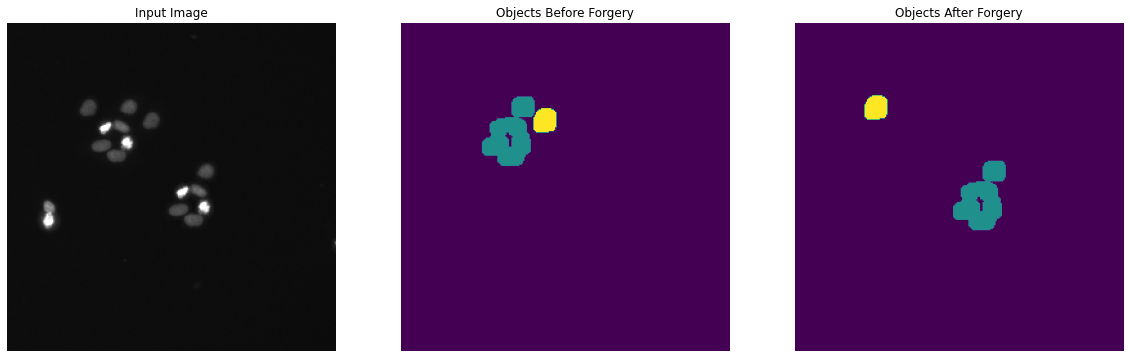

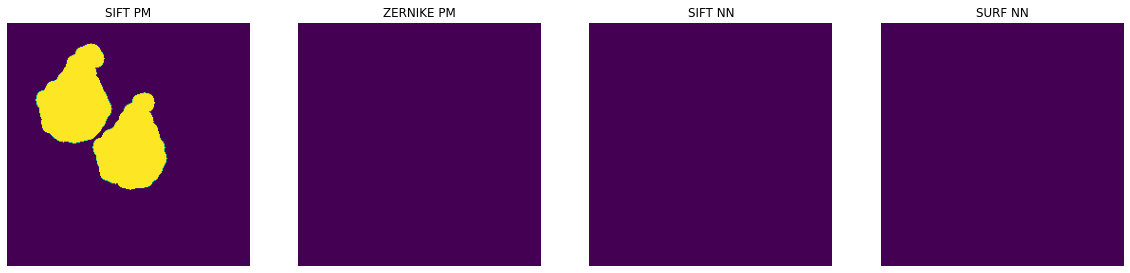

In [5]:
# Output Detection Map
plt.figure(figsize=(20,20))
plt.subplot(1, 3, 1); plt.imshow(img);plt.title("Input Image");plt.axis('off')
plt.subplot(1, 3, 2); plt.imshow(gt_before_forgery);plt.title("Objects Before Forgery");plt.axis('off')
plt.subplot(1, 3, 3); plt.imshow(gt_after_forgery);plt.title("Objects After Forgery");plt.axis('off')
plt.show()

plt.figure(figsize=(20,20))
plt.subplot(1, 4, 1); plt.imshow(siftPM);plt.title("SIFT PM");plt.axis('off')
plt.subplot(1, 4, 2); plt.imshow(zernikePM);plt.title("ZERNIKE PM");plt.axis('off')
plt.subplot(1, 4, 3); plt.imshow(siftNN);plt.title("SIFT NN");plt.axis('off')
plt.subplot(1, 4, 4); plt.imshow(surfNN);plt.title("SURF NN");plt.axis('off')
plt.show()

-----

# Natural Image

In [6]:
# Zernike using PatchMatch[2]
input_image='natural_image/natural_image.png'
output_image='natural_image/'

print("Running Zernike Features using PatchMatch [2,3]")
!docker run --rm --userns=host -v `pwd`:/input phillipecardenuto/cmfd:fd -i /input/$input_image -o /input/$output_image/fd_zernik_output.bin > /dev/null
        
print("Running Sift Features using PatchMatch [2,3]")
!docker run --rm --userns=host -v `pwd`:/input phillipecardenuto/cmfd:fd -mtd 1 -i /input/$input_image -o /input/$output_image/fd_sift_output.bin > /dev/null
        
print("Running Sift Features using regular Nearst Neighborhood [1]")
!docker run --rm --userns=host -v `pwd`:/input phillipecardenuto/cmfd:vole cmfd /input/configs/keypoint/sift.conf -I /input/$input_image -O /input/$output_image/vole_sift_ > /dev/null
        
print("Running Surf Features using regular Nearst Neighborhood [1]")
!docker run --rm --userns=host -v `pwd`:/input phillipecardenuto/cmfd:vole cmfd /input/configs/keypoint/surf.conf -I /input/$input_image -O /input/$output_image/vole_surf_ > /dev/null

Running Zernike Features using PatchMatch [2,3]
Running Sift Features using PatchMatch [2,3]
Running Sift Features using regular Nearst Neighborhood [1]
Running Surf Features using regular Nearst Neighborhood [1]


In [11]:
# Read Image
img = cv2.imread(input_image)

In [8]:
# Read Detection Maps
siftPM = np.fromfile("natural_image/fd_sift_output.bin",int32).reshape(img.shape[:2])
zernikePM = np.fromfile("natural_image/fd_zernik_output.bin",int32).reshape(img.shape[:2])
siftNN = cv2.imread("natural_image/vole_sift_natural_image_labeled.png",cv2.IMREAD_GRAYSCALE)
surfNN = cv2.imread("natural_image/vole_surf_natural_image_labeled.png",cv2.IMREAD_GRAYSCALE)

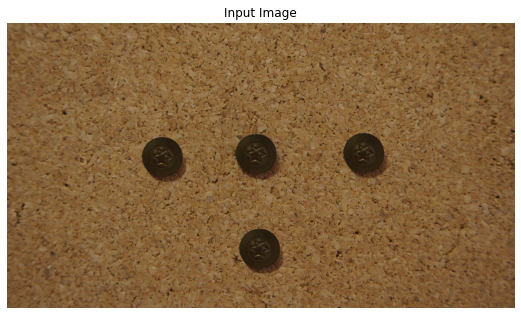

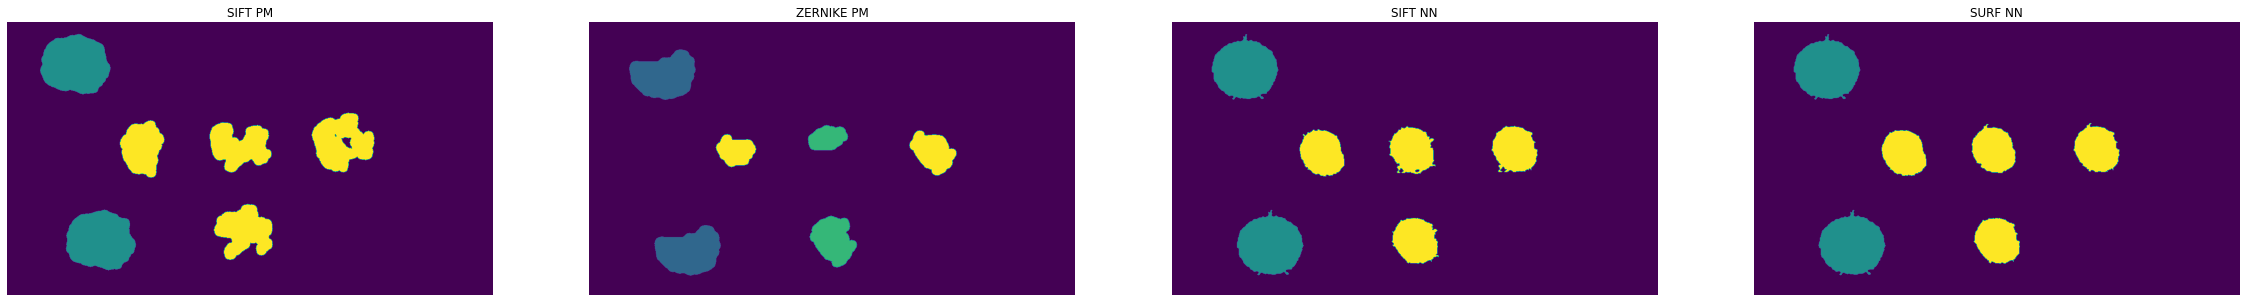

In [9]:
# Output Detection Map
plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));plt.title("Input Image");plt.axis('off')
plt.show()

plt.figure(figsize=(40,40))
plt.subplot(1, 4, 1); plt.imshow(siftPM);plt.title("SIFT PM");plt.axis('off')
plt.subplot(1, 4, 2); plt.imshow(zernikePM);plt.title("ZERNIKE PM");plt.axis('off')
plt.subplot(1, 4, 3); plt.imshow(siftNN);plt.title("SIFT NN");plt.axis('off')
plt.subplot(1, 4, 4); plt.imshow(surfNN);plt.title("SURF NN");plt.axis('off')
plt.show()